In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
### EDA
df=pd.read_excel("IrishConstructionIndexData.xlsx")

In [3]:
df.shape

(460, 5)

In [4]:
df.head(2)

,Statistic Label,Year,Type of Building and Construction,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000,Building (excluding civil engineering),Base 2015=100,199.844255


In [5]:
df.tail(2)

,Statistic Label,Year,Type of Building and Construction,UNIT,VALUE
458,Volume of Production Index in Building and Con...,2022,Non-residential building,Base 2015=100,138.403250
459,Volume of Production Index in Building and Con...,2022,Civil engineering,Base 2015=100,105.572834


In [6]:
df = df.rename(columns={'Statistic Label': 'StatisticLabel', 'Type of Building and Construction': 'TYPE'})  # rename
df.head(5)

,StatisticLabel,Year,TYPE,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000,Building (excluding civil engineering),Base 2015=100,199.844255
2,Value of Production Index in Building and Cons...,2000,Residential building,Base 2015=100,311.698160
3,Value of Production Index in Building and Cons...,2000,Non-residential building,Base 2015=100,121.431248
4,Value of Production Index in Building and Cons...,2000,Civil engineering,Base 2015=100,63.619979


In [7]:
print(df.StatisticLabel.value_counts())

Value of Production Index in Building and Construction                           115
Volume of Production Index in Building and Construction                          115
Value of Production Index in Building and Construction (Seasonally Adjusted)     115
Volume of Production Index in Building and Construction (Seasonally Adjusted)    115
Name: StatisticLabel, dtype: int64


In [8]:
print(df.TYPE.value_counts())

All building and construction             92
Building (excluding civil engineering)    92
Residential building                      92
Non-residential building                  92
Civil engineering                         92
Name: TYPE, dtype: int64


In [9]:
print(df.UNIT.value_counts())

Base 2015=100    460
Name: UNIT, dtype: int64


In [10]:
df.VALUE.min()

57.91289363

In [11]:
df.VALUE.max()

820.0043668

In [12]:
df.StatisticLabel.value_counts()

Value of Production Index in Building and Construction                           115
Volume of Production Index in Building and Construction                          115
Value of Production Index in Building and Construction (Seasonally Adjusted)     115
Volume of Production Index in Building and Construction (Seasonally Adjusted)    115
Name: StatisticLabel, dtype: int64

In [13]:
# 
df.StatisticLabel = df.StatisticLabel.astype("category") ### change column datatype
df.TYPE=df.TYPE.astype('category') ### change column datatype
df.dtypes

StatisticLabel    category
Year                 int64
TYPE              category
UNIT                object
VALUE              float64
dtype: object

In [14]:
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.Year=df.Year.astype('int') ### change column datatype
df.Year.max()

2022

In [15]:
df.Year.min()

2000

<Axes: >

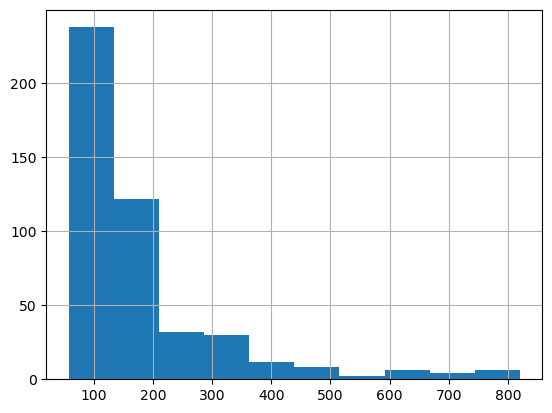

In [16]:
df.VALUE.hist()

In [17]:
#
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.dtypes

StatisticLabel          category
Year              datetime64[ns]
TYPE                    category
UNIT                      object
VALUE                    float64
dtype: object

In [18]:
df.dtypes

StatisticLabel          category
Year              datetime64[ns]
TYPE                    category
UNIT                      object
VALUE                    float64
dtype: object

<Axes: xlabel='Year'>

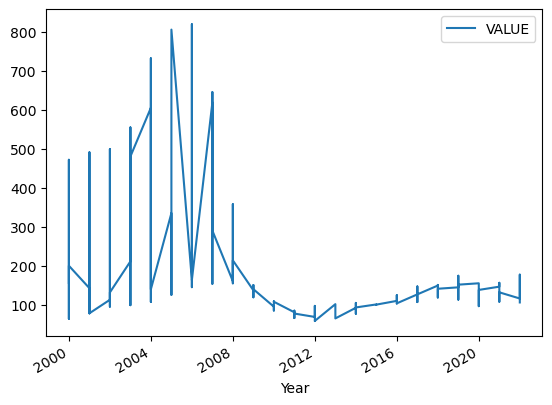

In [19]:
df.plot(x="Year",y="VALUE")

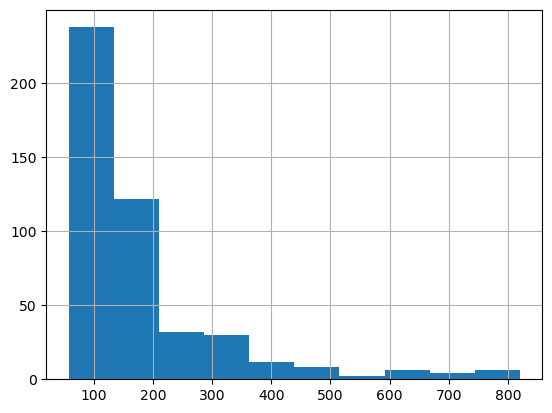

In [20]:
import matplotlib.pyplot as plt
df["VALUE"].hist(bins=10)
plt.show()

###  Time Series Model (1)

In [21]:
dftime=df ###  This is Irish dataset

In [22]:
dftime.dtypes

StatisticLabel          category
Year              datetime64[ns]
TYPE                    category
UNIT                      object
VALUE                    float64
dtype: object

In [23]:
dftime.head()

,StatisticLabel,Year,TYPE,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000-01-01,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000-01-01,Building (excluding civil engineering),Base 2015=100,199.844255
2,Value of Production Index in Building and Cons...,2000-01-01,Residential building,Base 2015=100,311.698160
3,Value of Production Index in Building and Cons...,2000-01-01,Non-residential building,Base 2015=100,121.431248
4,Value of Production Index in Building and Cons...,2000-01-01,Civil engineering,Base 2015=100,63.619979


In [24]:
dftime['Year'] = pd.to_datetime(dftime['Year'], format='%Y/%m/%d')

In [25]:
dftime=dftime[["Year","VALUE"]]
dftime

,Year,VALUE
0,2000-01-01,155.852221
1,2000-01-01,199.844255
2,2000-01-01,311.698160
3,2000-01-01,121.431248
4,2000-01-01,63.619979
...,...,...
455,2022-01-01,130.320963
456,2022-01-01,135.733187
457,2022-01-01,115.723415
458,2022-01-01,138.403250


<Axes: xlabel='Year'>

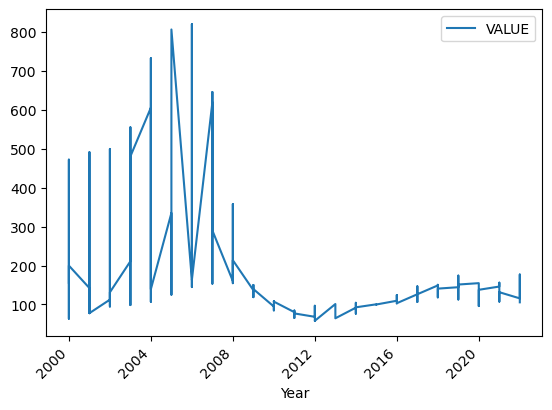

In [26]:
dftime.plot(x="Year",y="VALUE", rot=45)

In [27]:
print(dftime.shape)
print(dftime.tail(1))

(460, 2)
          Year       VALUE
459 2022-01-01  105.572834


####  A simple Time Series analysis ML model (1).

In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dftime['VALUE'], order=(1, 3, 1))  ### p,d,q,
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)

print(forecast)

460    102.994315
461     83.507730
462     73.045990
463     57.348781
464     44.257743
465     29.460817
466     15.329171
467      0.558919
468    -14.132943
469    -29.140685
Name: predicted_mean, dtype: float64


#### The actual value for row 460 is 105.57, predicted value is 102.99.  That's really accurate.  99.7%  This is a good TSA model.

In [29]:
### https://sparkbyexamples.com/pandas/time-series-plot-in-pandas/
### https://www.pluralsight.com/guides/machine-learning-for-time-series-data-in-python

# Multiple Linear regression.  Model (2)

In [30]:
# Multiple Linear regression.  Model (2)
df.head(5)

,StatisticLabel,Year,TYPE,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000-01-01,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000-01-01,Building (excluding civil engineering),Base 2015=100,199.844255
2,Value of Production Index in Building and Cons...,2000-01-01,Residential building,Base 2015=100,311.698160
3,Value of Production Index in Building and Cons...,2000-01-01,Non-residential building,Base 2015=100,121.431248
4,Value of Production Index in Building and Cons...,2000-01-01,Civil engineering,Base 2015=100,63.619979


In [31]:
#  Choose the relevant columns
dfML = df[["VALUE",'StatisticLabel','TYPE']]
dfML.head(5)

,VALUE,StatisticLabel,TYPE
0,155.852221,Value of Production Index in Building and Cons...,All building and construction
1,199.844255,Value of Production Index in Building and Cons...,Building (excluding civil engineering)
2,311.698160,Value of Production Index in Building and Cons...,Residential building
3,121.431248,Value of Production Index in Building and Cons...,Non-residential building
4,63.619979,Value of Production Index in Building and Cons...,Civil engineering


In [32]:
dfML.tail(5)

,VALUE,StatisticLabel,TYPE
455,130.320963,Volume of Production Index in Building and Con...,All building and construction
456,135.733187,Volume of Production Index in Building and Con...,Building (excluding civil engineering)
457,115.723415,Volume of Production Index in Building and Con...,Residential building
458,138.403250,Volume of Production Index in Building and Con...,Non-residential building
459,105.572834,Volume of Production Index in Building and Con...,Civil engineering


#### The dataset ('IrishConstructionIndexData.xlsx') has two major categorical columns, StatisticLabel And Type. Value is numerical and we will delete UNIT.

In [33]:
###  Multiple Linear Regression
X = dfML[['StatisticLabel','TYPE']] ### predictors
Y = dfML['VALUE']                   ### target
X= pd.get_dummies(data=X, drop_first=True)

In [34]:
X.shape

(460, 7)

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)
    
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
predicted

array([117.22978847, 162.61818201, 117.22978847, 127.26868396,
       117.22978847, 170.78249463, 205.14927691, 186.0908908 ,
       294.77263112, 162.61818201, 205.14927691, 285.75314049,
       118.13176908, 285.75314049, 161.763004  , 304.8115266 ,
       170.78249463, 117.27659107, 304.8115266 , 162.61818201,
       162.61818201, 285.75314049, 205.14927691, 109.06547585,
       126.2960817 , 161.763004  , 286.6083185 , 286.6083185 ,
       195.11038143, 109.06547585, 162.61818201, 186.0908908 ,
       127.26868396, 108.21029785, 180.82139011, 186.0908908 ,
       127.26868396, 108.21029785, 286.6083185 , 117.27659107,
       127.26868396, 180.82139011, 126.2960817 , 109.06547585,
       108.21029785, 304.8115266 , 186.94606881, 285.75314049,
       180.82139011, 118.13176908, 170.78249463, 118.13176908,
       127.26868396, 136.33497718, 118.13176908, 117.22978847,
       117.27659107, 304.8115266 , 294.77263112, 186.94606881,
       127.26868396, 162.61818201, 126.2960817 , 285.75

####  If we compare our predicted results to our actual results for the *first row*, we notice 155.85 (actual) and 117.229 (predicted)
####  If we compare our predicted results to our actual results for the *second* row, we notice 199.84 (actual) and 162.68 (predicted)
####  Obviously, this is not a good model.  We will use a Simple Linear Regression later as a comparison, it's a better model.

### Logistic regression  Model 3

In [36]:
dfML.TYPE.value_counts()

All building and construction             92
Building (excluding civil engineering)    92
Civil engineering                         92
Non-residential building                  92
Residential building                      92
Name: TYPE, dtype: int64

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score ## Cross Validation
from sklearn.model_selection import GridSearchCV    ## GridSearch
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')


In [38]:
def label_encoder(y):
    le = LabelEncoder()
    dfML[y] = le.fit_transform(dfML[y])
 
label_list = ["StatisticLabel","TYPE"]
 
for l in label_list:
    label_encoder(l)
 
#Display transformed data
dfML.sample(5)

,VALUE,StatisticLabel,TYPE
417,77.167247,3,4
287,65.703531,1,4
156,238.353136,2,1
210,144.755153,2,0
444,113.129452,3,2


####  'Type' is our target variable. 
All building and construction             0.
Building (excluding civil engineering)    1.
Civil engineering                         2.
Non-residential building                  3.
Residential building                      4.

In [39]:
#Divide the dataset into independent and dependent variables
X = dfML.drop(["TYPE"],axis=1)
y = dfML['TYPE']
 
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                               random_state=42, shuffle=True) 
 
#Data was splitted as 80% train data and 20% test data.
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (345, 2)
X_test shape: (115, 2)
y_train shape: (345, 1)
y_test shape: (115, 1)


In [40]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

In [42]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [43]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

In [44]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.3681159420289855
Test Score: 0.3391304347826087


In [45]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

In [46]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.33043478260869563
Test Score: 0.23478260869565218


In [47]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

In [48]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.5043478260869565
Test Score: 0.3826086956521739


In [49]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

In [50]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.3101449275362319
Test Score: 0.2956521739130435


In [51]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

In [52]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

Train Score: 0.3884057971014493
Test Score: 0.3739130434782609


In [53]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

In [54]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.284058
KNN Train Score,0.368116
SVM Train Score,0.330435
Decision Tree Train Score,0.504348
Random Forest Train Score,0.310145
Gaussian NB Train Score,0.388406


In [55]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.217391
KNN Test Score,0.339130
SVM Test Score,0.234783
Decision Tree Test Score,0.382609
Random Forest Test Score,0.295652
Gaussian NB Test Score,0.373913


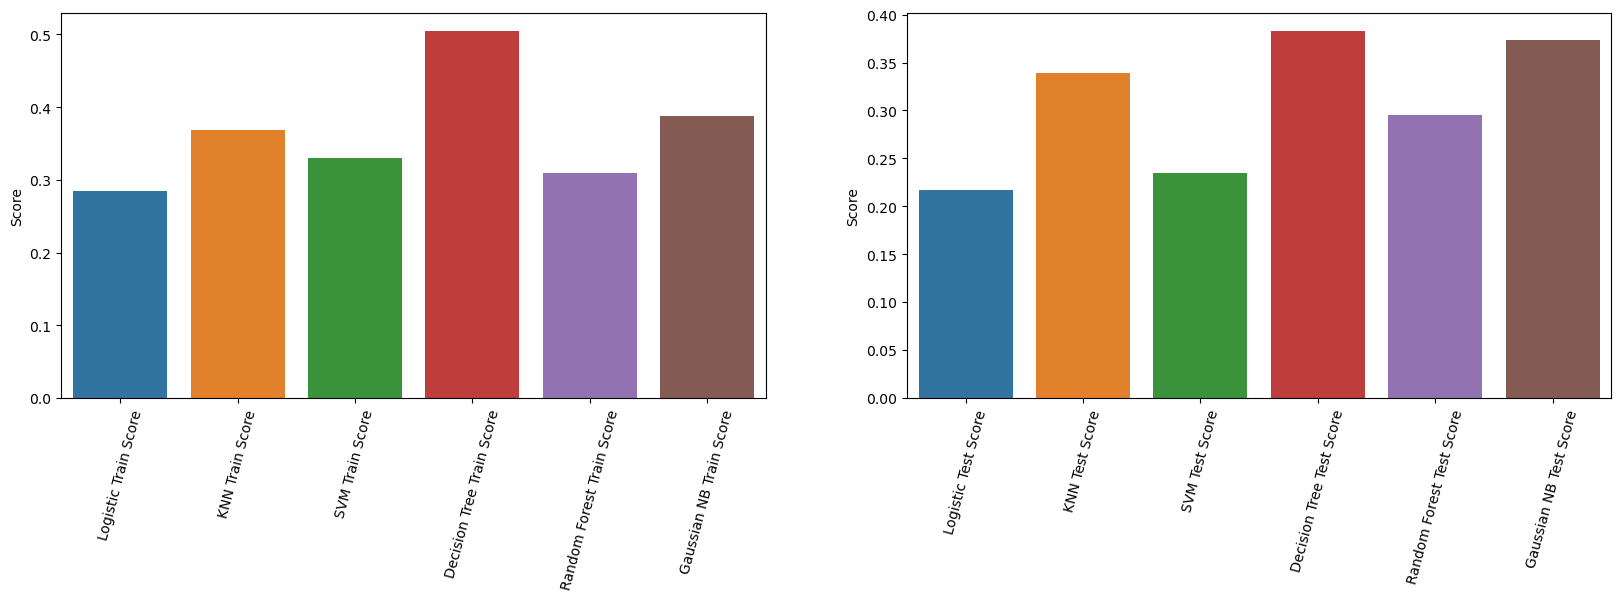

In [56]:
import seaborn as sns
 
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

###  Decision Trees works better than a logistic regression when we attempt to classify the TYPE of building construction.

####  DECISION TREES Model (4)

In [57]:
X=dfML[["VALUE","StatisticLabel"]]  ## predictors
y=dfML["TYPE"]                      ## target

In [58]:
# import the Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [59]:
# predicting a new value
  
# test the output by entering values, like 100 for value and 2 for Statistic Label
y_pred = regressor.predict([[100,2]])
  
# print the predicted price
print("Predicted Type: % d\n"% y_pred) 

Predicted Type:  3



####  Predicted Type was Non-residential building (3).  

####  Model (5) Simple linear regression

In [60]:
###
import numpy as np
import matplotlib as plt
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [61]:
### 
df=pd.read_excel("outputukhousebuilding.xlsx", sheet_name="2a",skiprows=5)

In [62]:
df.shape

(53, 10)

In [63]:
df.columns = df.columns.str.replace('Started - All Dwellings', 'Started_All_Dwellings')
df.columns = df.columns.str.replace('Completed - All Dwellings', 'Completed_All_Dwellings')
df.columns

Index(['Revised', 'Period', 'Started_All_Dwellings',
       'Started - Private Enterprise', 'Started - Housing Associations',
       'Started - Local Authorities', 'Completed_All_Dwellings',
       'Completed - Private Enterprise', 'Completed - Housing Associations',
       'Completed - Local Authorities'],
      dtype='object')

In [64]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [65]:
df.corr()

,Started_All_Dwellings,Completed_All_Dwellings,Completed - Private Enterprise,Completed - Local Authorities
Started_All_Dwellings,1.000000,0.927824,0.635476,0.814761
Completed_All_Dwellings,0.927824,1.000000,0.542512,0.927158
Completed - Private Enterprise,0.635476,0.542512,1.000000,0.204436
Completed - Local Authorities,0.814761,0.927158,0.204436,1.000000


####  Here, we observed a high correlation between two particular variables.  Using linear regression and r-squared, let's try to improve the accuracy even further.

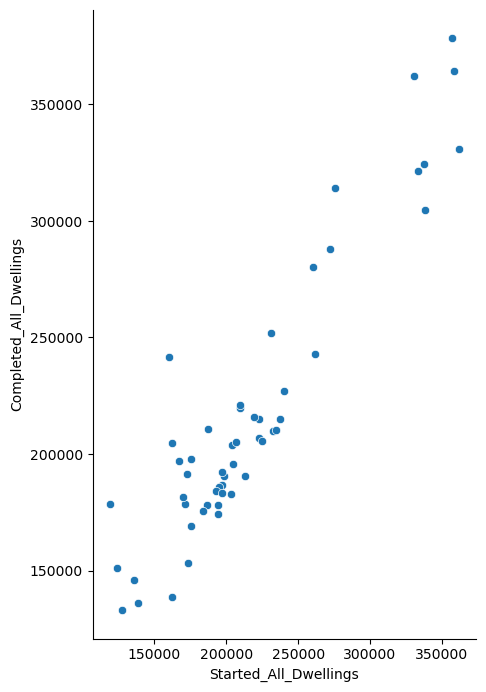

In [66]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Started_All_Dwellings'], y_vars='Completed_All_Dwellings', size=7, aspect=0.7)

In [67]:
# imports
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [68]:
### STATSMODELS ###
data=df
# create a fitted model
lm1 = smf.ols(formula='Completed_All_Dwellings ~ Started_All_Dwellings', data=data).fit()

# print the coefficients
lm1.params

Intercept                21412.246057
Started_All_Dwellings        0.906777
dtype: float64

In [69]:
# manually calculate the prediction for completed houses = 100,000 houses if the number of houses actually started = 112,0089
21412 + 0.906777*100000

112089.70000000001

In [70]:
### STATSMODELS ###  Calculate r with StatsModels

# You have to create a DataFrame since the Statsmodels formula expects it
X_new = pd.DataFrame({'Started_All_Dwellings': [100000]})

# predict for a new observation
lm1.predict(X_new)

0    112089.98832
dtype: float64

###  Our observations are almost identical.  112089.7 and 112089.988.  Let us draw the regressor line.

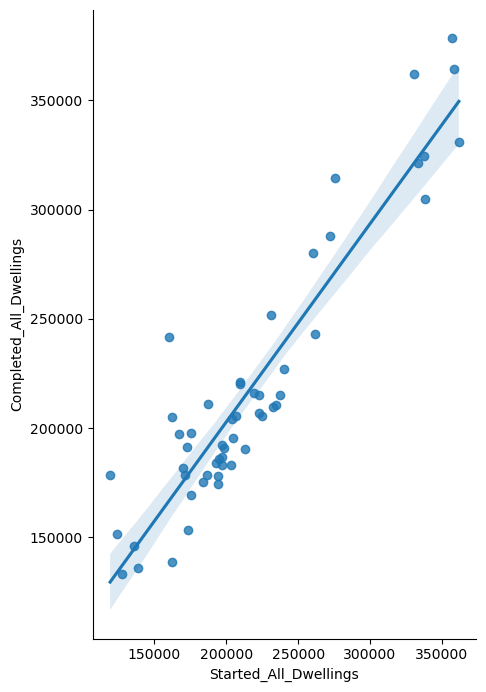

In [71]:
sns.pairplot(data, x_vars=['Started_All_Dwellings'], y_vars='Completed_All_Dwellings', size=7, aspect=0.7, kind='reg')

In [72]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients (we can accept, with 95% confidence that the predictions are accurate).
lm1.conf_int()

,0,1
Intercept,-1616.066797,44440.558912
Started_All_Dwellings,0.804294,1.009261


In [73]:
# Conventional hypothesis test

# null hypothesis:
# There is no relationship between Started_All_Dwellings and Completed_All_Dwellings
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept                6.769788e-02
Started_All_Dwellings    1.719878e-23
dtype: float64

###  Our p values are less than alpha (0.05) so we reject the null hypothesis.  There is a relationship between Dwellings Started and Dwellings Finished.

In [74]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.8608571607775113

####  Our model is very accurate.

###  Conclusion.  TSA, Decision Trees and Simple linear regression worked really well for predicting and classifying relevant variables and aspects of the construction industry.

https://github.com/osuade